## Import Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Data Preprocessing

## Training Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False, 
    
)

Found 95 files belonging to 4 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False, 
)

Found 95 files belonging to 4 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

### test if model is picking data

In [12]:
for x,y in training_set:
 print(x)
 print(y)
 break

tf.Tensor(
[[[[ 2.71875     1.71875     6.71875   ]
   [ 3.          2.          7.        ]
   [ 3.          3.          5.        ]
   ...
   [ 4.          2.          5.        ]
   [ 2.          0.          3.        ]
   [ 1.6640625   0.          2.6640625 ]]

  [[ 4.          3.          8.        ]
   [ 4.          3.          8.        ]
   [ 3.          3.          5.        ]
   ...
   [ 2.          0.          3.        ]
   [ 2.          0.          3.        ]
   [ 4.          2.          5.        ]]

  [[ 3.6796875   2.6796875   7.6796875 ]
   [ 3.6796875   2.6796875   7.6796875 ]
   [ 3.          3.          5.        ]
   ...
   [ 1.6796875   0.3203125   3.        ]
   [ 1.6796875   0.3203125   3.        ]
   [ 3.0390625   1.6796875   3.71875   ]]

  ...

  [[10.3203125   6.3203125   7.3203125 ]
   [ 9.          5.          6.        ]
   [ 8.          4.          5.        ]
   ...
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 

### To Avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There maybe a chance of underfitting so increase the number of neurons
3. Add more convolution layer to extract more feature from image 

### Building Model

In [13]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [15]:
model = Sequential()

In [16]:
## building Convolution Layer

In [17]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu')) 
model.add(MaxPool2D(pool_size=2,strides=2))

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu')) 
model.add(MaxPool2D(pool_size=2,strides=2))

In [19]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu')) 
model.add(MaxPool2D(pool_size=2,strides=2))

In [20]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu')) 
model.add(MaxPool2D(pool_size=2,strides=2))

In [21]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu')) 
model.add(MaxPool2D(pool_size=2,strides=2)) 

In [22]:
model.add(Dropout(0.25)) # to avoid overfitting

In [23]:
model.add(Flatten())

In [24]:
model.add(Dense(units=1500,activation='relu'))

In [25]:
model.add(Dropout(0.3)) 

## output Layer


In [26]:
model.add(Dense(units=4,activation='softmax'))

## compiling Model

In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         6,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,791,728 (29.72 MB)

 Trainable params: 7,791,728 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [31]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - accuracy: 0.7146 - loss: 0.7776 - val_accuracy: 0.7579 - val_loss: 0.6925
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step - accuracy: 0.7407 - loss: 0.7056 - val_accuracy: 0.7474 - val_loss: 0.6378
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.5931 - loss: 0.8373 - val_accuracy: 0.7579 - val_loss: 0.5943
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.7122 - loss: 0.6287 - val_accuracy: 0.8105 - val_loss: 0.5523
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.7645 - loss: 0.7070 - val_accuracy: 0.8000 - val_loss: 0.5197
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.7893 - loss: 0.5498 - val_accuracy: 0.8526 - val_loss: 0.4517
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.7996 - loss: 0.4830 - val_accuracy: 0.8632 - val_loss: 0.3973
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.8441 - loss: 0.4560 - val_accuracy: 0.8632 - val_loss: 0.3714
Epoch 9/

### Model Evaluation

### Model Evaluation on training set

In [32]:
train_loss,train_acc = model.evaluate(training_set)

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 786ms/step - accuracy: 0.8991 - loss: 0.2717


In [33]:
print(train_loss,train_acc)

0.2990724742412567 0.8842105269432068


In [34]:
val_loss,val_acc = model.evaluate(validation_set)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 758ms/step - accuracy: 0.8757 - loss: 0.3216


In [35]:
print(val_loss,val_acc)

0.2990724742412567 0.8842105269432068


### Saving Model

In [36]:
model.save("trained_model.keras")

In [38]:
training_history.history['val_accuracy']

[0.75789475440979,
 0.7473683953285217,
 0.75789475440979,
 0.8105263113975525,
 0.800000011920929,
 0.8526315689086914,
 0.8631578683853149,
 0.8631578683853149,
 0.8421052694320679,
 0.8842105269432068]

In [39]:
### Recording History in json
import json
with open("training_hist.json","w") as f:
     json.dump(training_history.history,f)

### Accuracy Visualization

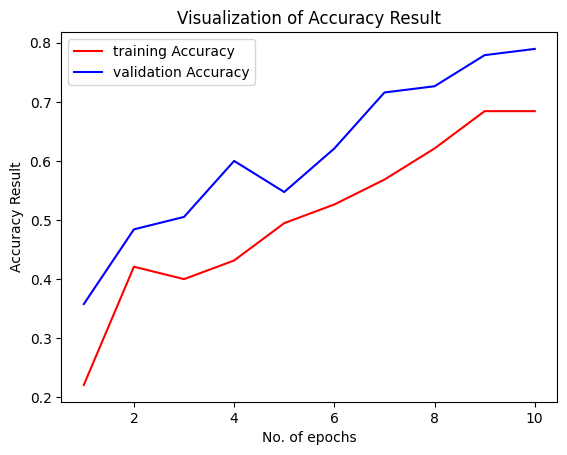

In [33]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='validation Accuracy')
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metric for model evaluation

In [40]:
class_name = validation_set.class_names
class_name

['Egg_Class B', 'Egg_Fresh Class A', 'Egg_Fresh Class AA', 'Egg_stale']

In [41]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False, 
)

Found 95 files belonging to 4 classes.


In [42]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 658ms/step


(array([[5.10168433e-01, 2.58852452e-01, 2.23538265e-01, 7.44085200e-03],
        [8.74551237e-01, 2.55161989e-02, 3.90542741e-03, 9.60272104e-02],
        [5.37396193e-01, 2.81525373e-01, 1.26138553e-01, 5.49399145e-02],
        [7.05622435e-01, 1.02478657e-02, 2.34847173e-01, 4.92825955e-02],
        [9.81127620e-01, 4.84293327e-03, 1.38530636e-03, 1.26441633e-02],
        [5.68765938e-01, 1.50726531e-02, 3.96050304e-01, 2.01110877e-02],
        [8.15737605e-01, 8.03703144e-02, 8.47109705e-02, 1.91811509e-02],
        [4.93840337e-01, 4.98666644e-01, 3.53367208e-03, 3.95939359e-03],
        [4.93840337e-01, 4.98666644e-01, 3.53367208e-03, 3.95939359e-03],
        [6.68294072e-01, 3.26355785e-01, 4.24310332e-04, 4.92576230e-03],
        [9.49108720e-01, 1.14739584e-02, 1.27041421e-03, 3.81469801e-02],
        [3.88539284e-01, 1.74569428e-01, 1.31189600e-01, 3.05701733e-01],
        [9.91870165e-01, 4.82516596e-03, 8.11930629e-04, 2.49272189e-03],
        [4.93840337e-01, 4.98666644e-0

In [43]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [44]:
predicted_categories

<tf.Tensor: shape=(95,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 3,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3], dtype=int64)>

In [46]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(95, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
 

In [47]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(95,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3], dtype=int64)>

In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                    precision    recall  f1-score   support

       Egg_Class B       0.84      0.80      0.82        20
 Egg_Fresh Class A       0.78      0.82      0.80        22
Egg_Fresh Class AA       0.97      0.91      0.94        34
         Egg_stale       0.90      1.00      0.95        19

          accuracy                           0.88        95
         macro avg       0.87      0.88      0.88        95
      weighted avg       0.89      0.88      0.88        95



In [51]:
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(4, 4)

### Confusion Matrix Visualization

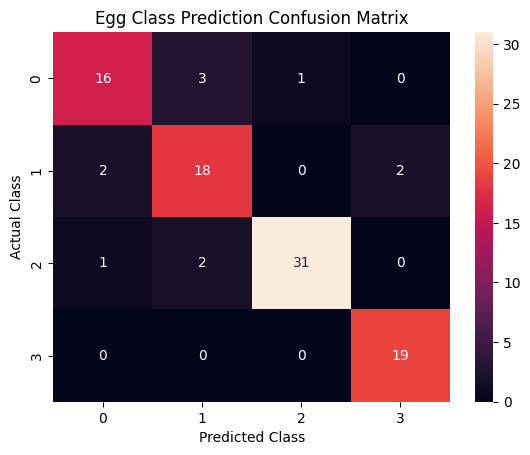

In [53]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class") 
plt.title("Egg Class Prediction Confusion Matrix")
plt.show()